# **Total Solutions Purchase Analysis**

## Problem Statement

### Total Solutions is a conglomerate that has a chain of stores across cities in India. They have collected data on their sales orders and want to derive insights to understand business performance across various metrics. They had discovered some insights from the past data and want to determine if those metrics still hold true 

#### We have a dataset that has information about the purchase amount for various orders, along with details about users, products, age group, and other important features

<hr>

## **Dataset Dictionary**

* **User_ID:**
  * **This column represents the unique identifier for each user or customer who made the purchase.**

* **Product_ID:**
  * **This column contains the unique identifier for each product that was purchased.**

* **Gender:**
  * **This column indicates the gender of the user who made the purchase. It could have values such as "Male" or "Female."**

* **Age:**
  * **This column represents the age group or category of the user who made the purchase. It can be categorized into different age ranges, such as "18-25," "26-35," "36-45," and so on.**

* **Occupation:**
  * **This column denotes the occupation of the user who made the purchase. It may include numerical or categorical values representing different professions or job types.**

* **City_Category:**
  * **This column categorizes the city or region from which the purchase was made. It typically includes labels like "A," "B," or "C" to represent different city categories or types.**

* **Stay_In_Current_City_Years:**
  * **This column indicates the number of years the user has been living in their current city. It may have values such as "0" for less than a year, "1" for one year, "2" for two years, and so on.**

* **Marital_Status:**
  * **This column represents the marital status of the user. It could be encoded as "0" for unmarried/single and "1" for married.**

* **Product_Category_1:**
  * **This column refers to the primary category of the purchased product. It may contain numerical or categorical values representing different product categories.**

* **Product_Category_2:**
  * **This column corresponds to the secondary category of the purchased product. It could also contain numerical or categorical values, but it is not necessarily present in all datasets.**

* **Product_Category_3:**
  * **This column represents the tertiary category of the purchased product. Similar to the previous column, it may include numerical or categorical values and might not be present in all datasets.**

* **Purchase:**
  * **This column contains the amount or value of the purchase made by the user. It represents the monetary value or quantity associated with the transaction.**

<hr>

## Importing Preliminary Libraries



In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<hr>

## Importing Dataset 


In [216]:
df = pd.read_csv("purchase_data.csv")

In [217]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


<hr>

## Exploratory Data Analysis

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


**We have a total 263,015 records. We have significant null values in Product_Category_2 and Product_Category_3. All the other columns have one null value**

In [221]:
#To verify this, we will check null values
df.isnull().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

**Product_Category_2 & Product_Category_3 have null values in instances where a user has not purchased any products from these categories. We will fill these Null values with 0**

In [223]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(0)
df["Product_Category_3"] = df["Product_Category_3"].fillna(0)

In [224]:
#Verifying Null values after filling with 0
df.isnull().sum()

User_ID                       0
Product_ID                    1
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            1
Product_Category_2            0
Product_Category_3            0
Purchase                      1
dtype: int64

In [225]:
# We can drop the remaining null values
df = df.dropna()

In [226]:
# Verifying null values after dropping them
df.isnull().sum().sum()

0

**All the null values have been removed**

### Analyzing Gender Column

In [229]:
df["Gender"].value_counts()    #Total Purchases by each Gender

Gender
M    198488
F     64526
Name: count, dtype: int64

**Total Purchases by male is 198,488 while by women made 64526 purchases**

<Axes: xlabel='Gender'>

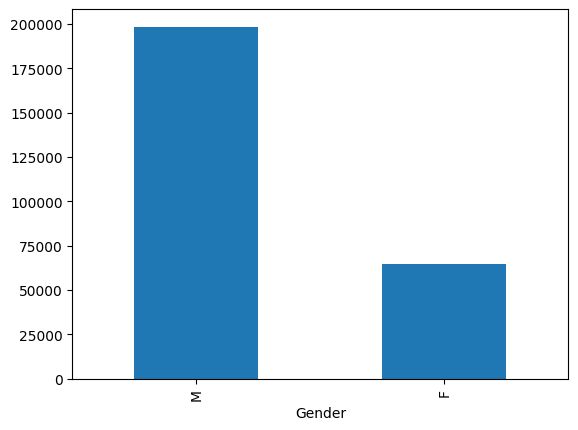

In [231]:
# Visualizing total purchases by Gender
df["Gender"].value_counts().plot.bar()

In [232]:
# Proportion of Purchases by Male
print("Proportion of Male:")
print(df["Gender"].value_counts()[0]/len(df)*100)

# Proportion of Purchases by Female
print("Proportion of Female:")
print(df["Gender"].value_counts()[1]/len(df)*100)

Proportion of Male:
75.46670519440029
Proportion of Female:
24.533294805599702


**Male made 75.47% of total purchases while women made 24.43%**

**Since the user_id is repeated, we can use groupby to find the total users by gender**

In [235]:
grouped_gender = df.groupby(["Gender", "User_ID"]).size().reset_index(name="Count")
grouped_gender["Gender"].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

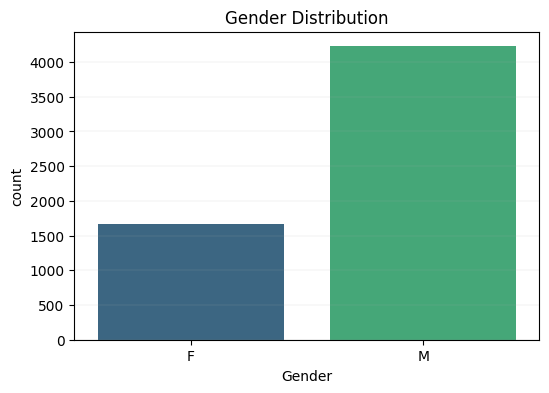

In [236]:
# Visualizing number of users by Gender
plt.figure(figsize=(6,4))
sns.countplot(x=grouped_gender["Gender"], palette="viridis")
plt.title("Gender Distribution")
plt.grid(axis="y", linewidth=0.3, alpha=0.4)
plt.show()

**Total number of male users is 4225 while female users stand at 1666, making total users 5891**

### Analyzing Age Column

In [239]:
df["Age"].value_counts()   #Number of purchases by each Age group

Age
26-35    104912
36-45     52396
18-25     48193
46-50     21619
51-55     18509
55+       10321
0-17       7064
Name: count, dtype: int64

**Age group 26-35 has the highest purchases - 104,912. It is almost twice as the second most purchased group 36-45, which has 52,396 purchases. Age group 0-17 has the least number of purchases at just 7064**

     Age  User_ID
2  26-35     2053
3  36-45     1167
1  18-25     1069
4  46-50      531
5  51-55      481
6    55+      372
0   0-17      218


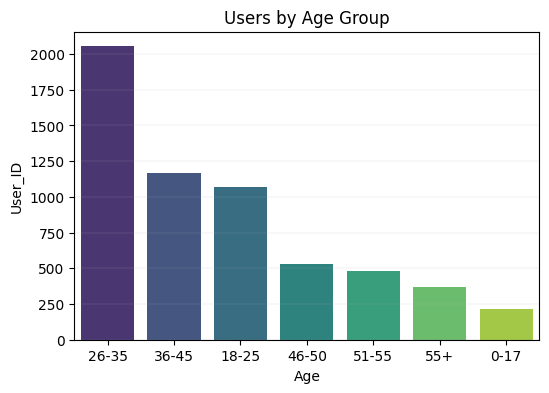

In [241]:
# Group by Age and unique users for each age group
grouped_age = df.groupby(["Age"])["User_ID"].nunique().reset_index().sort_values(by="User_ID", ascending=False)

# Displaying unique users for each age group
print(grouped_age)

# Visualizing for unique user for each age group
plt.figure(figsize=(6,4))
sns.barplot(data=grouped_age, x="Age", y="User_ID", palette="viridis", order=grouped_age["Age"])
plt.title("Users by Age Group")
plt.grid(axis="y", linewidth=0.3, alpha=0.4)
plt.show()

**Age group 26-35 has maximum users with 2053 while 0-17 age group has the least at 218**

          Purchase
Age               
26-35  975615086.0
36-45  492346613.0
18-25  442696277.0
46-50  200909949.0
51-55  178134937.0
55+     97231211.0
0-17    64173683.0


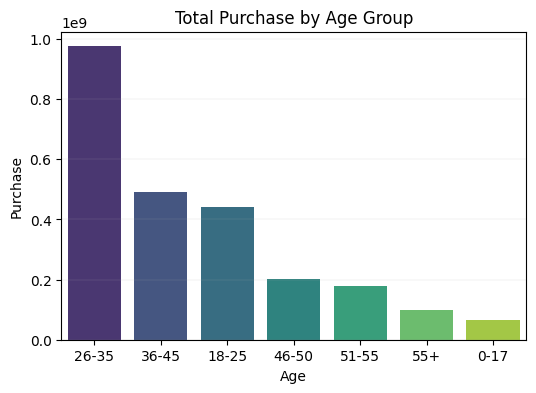

In [243]:
# Grouping by Age and calculating total purchase amount for each age group
grouped_age_purchase = df.groupby(["Age"])["Purchase"].sum()
grouped_age_purchase = pd.DataFrame(grouped_age_purchase).sort_values(by="Purchase", ascending=False)

# Display total purchase by each age group
print(grouped_age_purchase)

# Visualizing total purchase by each age group
plt.figure(figsize=(6,4))
sns.barplot(data=grouped_age_purchase, x="Age", y="Purchase", palette="viridis")
plt.title("Total Purchase by Age Group")
plt.grid(axis="y", linewidth=0.3, alpha=0.4)
plt.show()

**Age group 26-35 has the highest total purchase amount at 975+ Million, while age group 0-17 has the lowest total purchase amount at 64+ Million**

In [245]:
# Merging grouped_age and grouped_age_purchase to calculat the average purchase amount by age group per user
grouped_merged = pd.merge(grouped_age, grouped_age_purchase, on="Age", how="inner")

# Renaming the columns
grouped_merged.rename(columns = 
                      {"User_ID" : "Unique_Users",
                       "Purchase" : "Total_Purchase"},
                       inplace=True
                     )

# Calculating average purchase amount
grouped_merged["Average_Purchase_by_Age"] = grouped_merged["Total_Purchase"] / grouped_merged["Unique_Users"]
grouped_merged

,Age,Unique_Users,Total_Purchase,Average_Purchase_by_Age
0,26-35,2053,975615086.0,475214.362396
1,36-45,1167,492346613.0,421890.842331
2,18-25,1069,442696277.0,414121.868101
3,46-50,531,200909949.0,378361.485876
4,51-55,481,178134937.0,370342.904366
5,55+,372,97231211.0,261374.223118
6,0-17,218,64173683.0,294374.692661


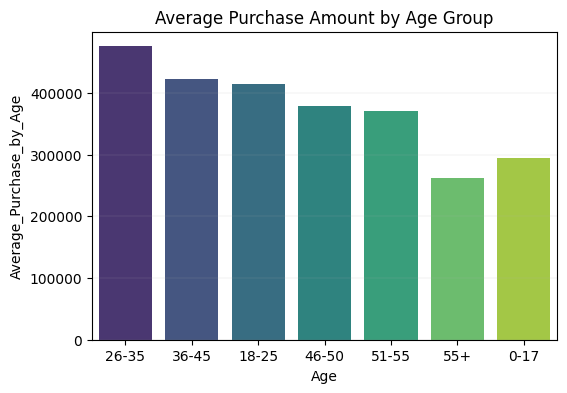

In [246]:
# Visualizing total purchase by each age group
plt.figure(figsize=(6,4))
sns.barplot(data=grouped_merged, x="Age", y="Average_Purchase_by_Age", palette="viridis")
plt.title("Average Purchase Amount by Age Group")
plt.grid(axis="y", linewidth=0.3, alpha=0.4)
plt.show()

**As expected, age group 26-35 has the highest average purchase amount per user. 0-17 age group had the lowest total purchase but it pips 55+ age group in average purchase amount**

### Analyzing Occupation Column

In [249]:
df["Occupation"].value_counts() #Purchases by Occupation

Occupation
4.0     34705
0.0     33372
7.0     28342
1.0     22390
17.0    19167
20.0    16129
12.0    14642
14.0    13214
2.0     12615
16.0    12143
6.0      9782
3.0      8527
10.0     6068
5.0      5835
15.0     5770
11.0     5633
19.0     4034
13.0     3755
18.0     3161
9.0      3008
8.0       722
Name: count, dtype: int64

**Occupation 4.0 has the maximum purhcases followed closed by 0.0. While Occupation 8.0 has made the least purchases**

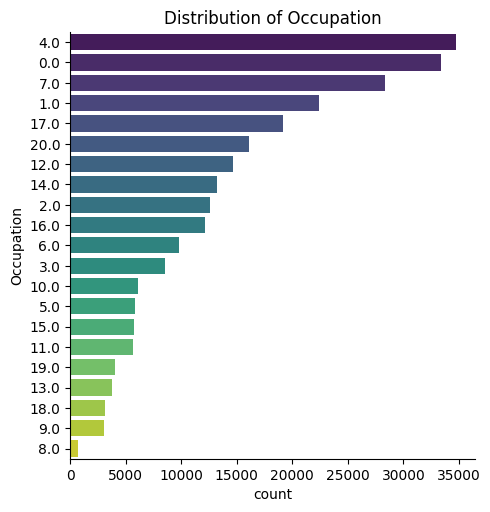

In [251]:
# Visualizing the distribution of Occupation column
occupation_order = df["Occupation"].value_counts().index
sns.catplot(y=df["Occupation"], kind="count", order=occupation_order, palette="viridis")
plt.title("Distribution of Occupation")
plt.show()

**Occupation 4.0, 0.0, and 7.0 have made the maximum purchases while 19.0, 13.0, 18.0, 9.0 and 8.0 are languishing at the bottom with less than 5000 purhcases**

### Analyzing City_Category Column

In [254]:
df["City_Category"].value_counts()

City_Category
B    111124
C     81100
A     70790
Name: count, dtype: int64

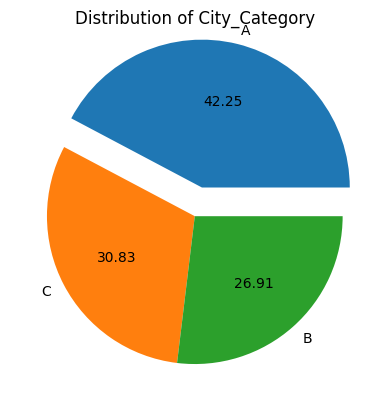

In [255]:
# Visualizing the concentration of purchases by City_Category
plt.pie(df["City_Category"].value_counts(), labels=df["City_Category"].unique(), autopct= "%.2f", explode=[0.2,0,0])
plt.title("Distribution of City_Category")
plt.show()

**City A has made the maximum purhcases with 42.25% and city B and C are at 30.83% and 26.91% respectively**

### Analyzing Stay_In_Current_City_Years Column

In [258]:
df["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     92588
2     48580
3     45569
4+    40665
0     35612
Name: count, dtype: int64

In [259]:
# Replacing 4+ with 4 to make the column integer type
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace("4+", 4)

In [260]:
df["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1    92588
2    48580
3    45569
4    40665
0    35612
Name: count, dtype: int64

### Analyzing Marital_Status Column

In [262]:
df["Marital_Status"].value_counts()

Marital_Status
0.0    155524
1.0    107490
Name: count, dtype: int64

In [263]:
# Calculating unique users, total purchase amount and average puchase amount according to marital status
grouped_marital = df.groupby(["Marital_Status"]).agg(Unique_Users = ("User_ID", "nunique"),
                                                     total_purchase = ("Purchase", "sum")
                                                    ).reset_index()

grouped_marital["Avg_Purchase_Amount"] = grouped_marital["total_purchase"]/grouped_marital["Unique_Users"]
grouped_marital

,Marital_Status,Unique_Users,total_purchase,Avg_Purchase_Amount
0,0.0,3417,1.447350e+09,423573.265145
1,1.0,2474,1.003758e+09,405722.679466


* **Marital status 0.0 is Unmarried and Marital Status 1.0 is Married**
* **The Unmarried group has a higher average purchase amount per user - 423,573 than the married group, which has 405,722**
* **The unmarried group also has more users - 3417 than the married group, which has 2474 users**

### Analyzing Purchase Column

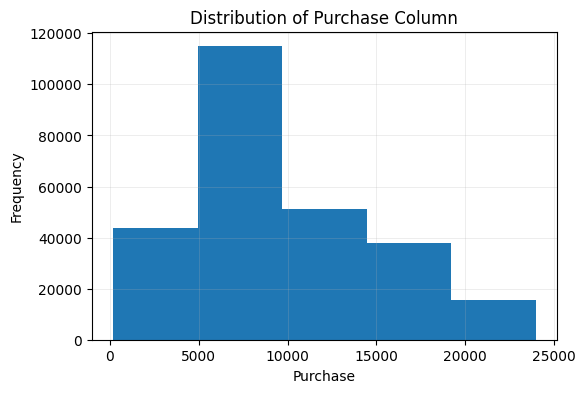

In [266]:
#Visualizing the distribution of Purchase Column
plt.figure(figsize=(6,4))
plt.hist(df["Purchase"], bins=5)
plt.title("Distribution of Purchase Column")
plt.xlabel("Purchase")
plt.ylabel("Frequency")
plt.grid(linewidth=0.4, alpha=0.4)
plt.show()

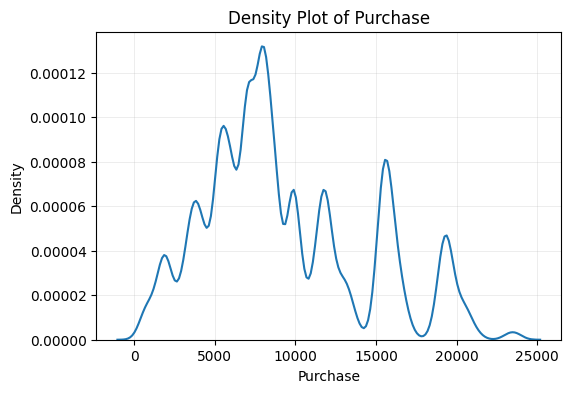

In [267]:
# Visualizing the density distribution of Purchase column
plt.figure(figsize=(6,4))
sns.kdeplot(df["Purchase"], palette="Dark2")
plt.title("Density Plot of Purchase")
plt.grid(linewidth=0.4, alpha=0.4)
plt.show()

**The distribution is not normal, it is skewed towards right**

**We will perform Shapiro Wilker test to verify the normality of distribution**

In [270]:
from scipy.stats import shapiro #Importing from scipy

# Applying shapiro test to Purchase Column
shapiro_purchase = shapiro(df["Purchase"])

# Display the shapiro_statistic and p_value
print("Shapiro_test", shapiro_purchase)

# Null hypothesis: H0: Distribution is normal
# Alternate hypothesis: H1: Distribution is not normal

# Condition for hypothesis outcome
if shapiro_purchase[1] < 0.05:
    print("Distribution is not normal")
else:
    print("Distribution is normal")

Shapiro_test ShapiroResult(statistic=0.9503193681559975, pvalue=3.578262132169902e-112)
Distribution is not normal


**We have verified the non-nomrality of distribution from Shapiro Wilker test**

**We will analyze the distribution of Purchase amount per unique user**

In [273]:
# Purchase amount per user
group_userid = df.groupby(["User_ID"]).agg(Purchase_amount = ("Purchase", "sum"))

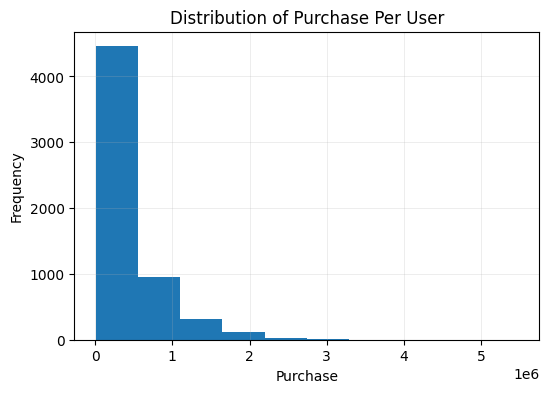

In [274]:
#Visualizing the distribution of Purchase Column
plt.figure(figsize=(6,4))
plt.hist(group_userid["Purchase_amount"], bins=10)
plt.title("Distribution of Purchase Per User")
plt.xlabel("Purchase")
plt.ylabel("Frequency")
plt.grid(linewidth=0.4, alpha=0.4)
plt.show()

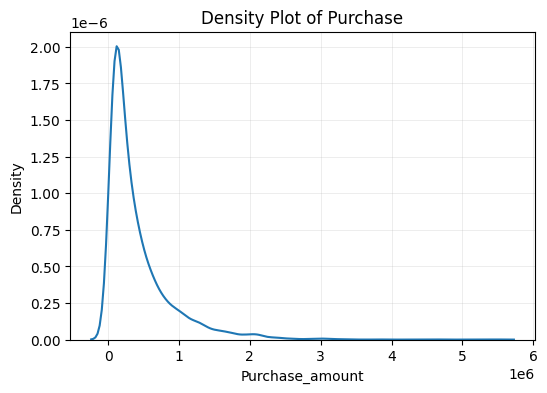

In [275]:
# Visualizing the density distribution of Purchase column
plt.figure(figsize=(6,4))
sns.kdeplot(group_userid["Purchase_amount"])
plt.title("Density Plot of Purchase")
plt.grid(linewidth=0.4, alpha=0.4)
plt.show()

In [276]:
# Applying shapiro test to Purchase amount per user 
shapiro_purchase = shapiro(group_userid["Purchase_amount"])

# Display the shapiro_statistic and p_value
print("Shapiro_test", shapiro_purchase)

# Null hypothesis: H0: Distribution is normal
# Alternate hypothesis: H1: Distribution is not normal

# Condition for hypothesis outcome
if shapiro_purchase[1] < 0.05:
    print("Distribution is not normal")
else:
    print("Distribution is normal")

Shapiro_test ShapiroResult(statistic=0.7380354622135341, pvalue=2.244971882989444e-70)
Distribution is not normal


**Purchase amount per user also does not follow not distribution**

### Analyzing Purchase by Age, City and Gender

In [279]:
grouped_purchase = df.groupby(
                ["Age", "City_Category", "Gender"]
                ).agg(
                    Orders = ("User_ID", "count"), 
                    Total_Purchase = ("Purchase", "sum"),
                    Unique_Users = ("User_ID", "nunique")
)

In [280]:
grouped_purchase

Orders  Total_Purchase  Unique_Users
Age   City_Category Gender                                      
0-17  A             F          710       5597020.0            14
                    M          517       5154021.0            11
      B             F          722       6512597.0            18
                    M         1788      16074607.0            32
      C             F          958       8347107.0            46
                    M         2369      22488331.0            97
18-25 A             F         3006      24973282.0            56
                    M        10315      92790051.0           158
      B             F         5676      45643142.0            94
                    M        15477     145290354.0           237
      C             F         3179      29087161.0           137
                    M        10540     104912287.0           387
26-35 A             F         8250      72221623.0           123
                    M        27039     244667576.0           338
      B             F        10186      87811418.0           184
                    M        33639     314484488.0           468
      C             F         5496      50451217.0           238
                    M        20302     205978764.0           702
36-45 A             F         3340      29231103.0            53
                    M         9385      85540082.0           123
      B             F         5238      45613855.0            98
                    M        17496     161795671.0           237
      C             F         4258      40685728.0           182
                    M        12679     129480174.0           474
46-50 A             F          592       5205351.0            18
                    M         3010      24955294.0            35
      B             F         3061      26423475.0            58
                    M         6626      63955948.0            88
      C             F         2623      24338682.0           106
                    M         5707      56031199.0           226
51-55 A             F          868       7618767.0            21
                    M         2050      20178731.0            46
      B             F         2127      18807466.0            36
                    M         6570      62627085.0            99
      C             F         1794      17524214.0            85
                    M         5100      51378674.0           194
55+   A             F          169       1626990.0            10
                    M         1539      12950185.0            39
      B             F          662       5948655.0            15
                    M         1856      18976096.0            43
      C             F         1611      14442974.0            74
                    M         4484      43286311.0           191

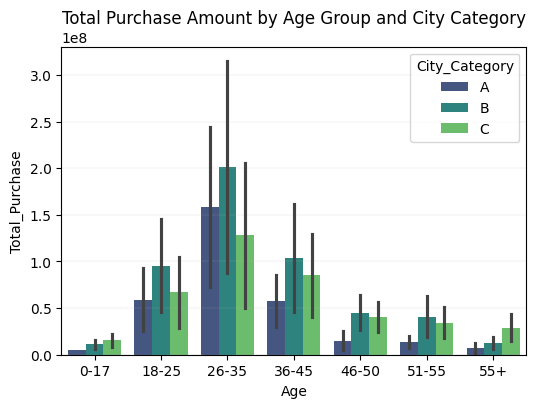

In [281]:
# Visualizing Total Purchase by Age group and City Category
plt.figure(figsize=(6,4))
sns.barplot(data=grouped_purchase, x="Age", y="Total_Purchase", hue="City_Category", palette="viridis")
plt.title("Total Purchase Amount by Age Group and City Category")
plt.grid(axis="y", linewidth=0.3, alpha=0.4)
plt.show()

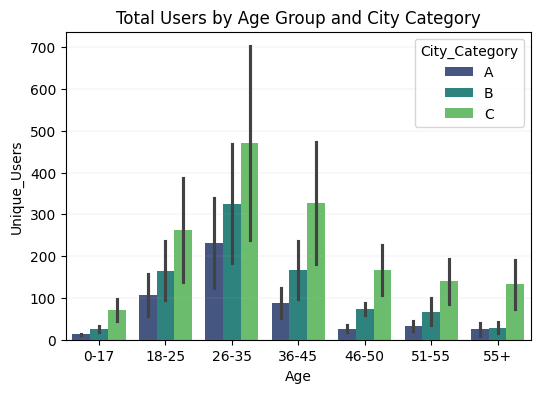

In [282]:
# Visualizing total users by Age group and City Category
plt.figure(figsize=(6,4))
sns.barplot(data=grouped_purchase, x="Age", y="Unique_Users", hue="City_Category", palette="viridis")
plt.title("Total Users by Age Group and City Category")
plt.grid(axis="y", linewidth=0.3, alpha=0.4)
plt.show()

* **Cities in B-Category consistently wreck in the highest total number of purchases from age groups 18-25 to 51-55, and the cities in category C wreck-in the most users for each age group**
* **This shows that City B has a higher average purchase amount compared to City C and City A**

<hr>

## Encoding Categorical Columns

In [285]:
from sklearn.preprocessing import LabelEncoder #Importing from skleran

In [286]:
encoder = LabelEncoder() # Instnatiating Label encoder

In [287]:
# Encoding and keeping a log of encoded classes
cat_columns = ["Gender", "Age", "City_Category"]
encoded_mapping = []
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])
    encoded_mapping.append(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

In [288]:
encoded_mapping

[{'F': 0, 'M': 1},
 {'0-17': 0,
  '18-25': 1,
  '26-35': 2,
  '36-45': 3,
  '46-50': 4,
  '51-55': 5,
  '55+': 6},
 {'A': 0, 'B': 1, 'C': 2}]

In [289]:
# Verify the data types after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263014 entries, 0 to 263013
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263014 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  int32  
 3   Age                         263014 non-null  int32  
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  int32  
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          263014 non-null  float64
 10  Product_Category_3          263014 non-null  float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int32(3), int64(1), object(2)
memory usage: 23.1+ MB


In [290]:
# Converting Stay_In_Current_City_Years to numeric format
df["Stay_In_Current_City_Years"] = pd.to_numeric(df["Stay_In_Current_City_Years"], errors="coerce")

In [291]:
# Verify the data type after conversion
df["Stay_In_Current_City_Years"].dtype

dtype('int64')

In [292]:
#Verify if all the Product_ID records start with P. If yes, we can strip the initial P and the column can be converted to numerical dtype
if (df["Product_ID"].str[0] == "P").all():
    print("All ProductIDs start with P")
else:
    print("Not all products start with P")

All ProductIDs start with P


In [293]:
# Stripping the Iniital P from all the records in product_ID column
df["Product_ID"] = df["Product_ID"].str[1:]

In [294]:
# Converting the Product_ID column to Int dtype
df["Product_ID"] = pd.to_numeric(df["Product_ID"], errors="coerce")

In [295]:
# Verify all the data types before proceeding
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263014 entries, 0 to 263013
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263014 non-null  int64  
 1   Product_ID                  263014 non-null  int64  
 2   Gender                      263014 non-null  int32  
 3   Age                         263014 non-null  int32  
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  int32  
 6   Stay_In_Current_City_Years  263014 non-null  int64  
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          263014 non-null  float64
 10  Product_Category_3          263014 non-null  float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int32(3), int64(3)
memory usage: 23.1 MB


In [296]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,263014.0,1.002945e+06,1702.909266,1000001.0,1001457.0,1002972.0,1004335.0,1006040.0
Product_ID,263014.0,1.732831e+05,101803.065403,142.0,96542.0,165842.0,256742.0,370642.0
Gender,263014.0,7.546671e-01,0.430285,0.0,1.0,1.0,1.0,1.0
Age,263014.0,2.494742e+00,1.354666,0.0,2.0,2.0,3.0,6.0
Occupation,263014.0,8.083558e+00,6.524052,0.0,2.0,7.0,14.0,20.0
City_Category,263014.0,1.039199e+00,0.758923,0.0,0.0,1.0,2.0,2.0
Stay_In_Current_City_Years,263014.0,1.859654e+00,1.290596,0.0,1.0,2.0,3.0,4.0
Marital_Status,263014.0,4.086855e-01,0.491592,0.0,0.0,0.0,1.0,1.0
Product_Category_1,263014.0,5.291099e+00,3.745722,1.0,1.0,5.0,8.0,18.0
Product_Category_2,263014.0,6.793680e+00,6.211567,0.0,0.0,5.0,14.0,18.0


<hr>

# Hypothesis Testing

## Hypothesis 1
### It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

In [299]:
#Creating a data frame of men in the age group 18-25
df_men_18_25 = df[(df["Gender"] == 1) & (df["Age"] == 1)] 
df_men_18_25 = pd.DataFrame(df_men_18_25)
print(df_men_18_25.shape)

(36332, 12)


In [300]:
# Getting the Total Purchase amount per each user
men1825 = df_men_18_25.groupby(["User_ID"])["Purchase"].sum()
men1825 = pd.DataFrame(men1825)
men1825.head()

,Purchase
User_ID,
1000021,55862.0
1000022,673323.0
1000025,244879.0
1000039,186804.0
1000046,83749.0


In [301]:
men1825.shape

(782, 1)

In [302]:
#Generating random sample
sample_men1825 = men1825.sample(30, random_state=42)

* **Null hypothesis: H0: Average Purchase by Men in 18-25 age group is 10000**
* **Alternate hypothesis: H1: Average Purchase by Men in 18-25 age group is not 10000**

In [304]:
# Hypothesized population mean
pop_mean = 10000

In [305]:
from scipy.stats import ttest_1samp #Import ttest_1samp from scipy.stats

# Implement t-test
t_statistic, p_value = ttest_1samp(sample_men1825, popmean=pop_mean)

# Display t_stat and p_value
print("T-Statisic:", t_statistic)
print("p_value", p_value)

# Check the condition for hypothesis
if p_value < 0.05:
    print("We have enough evidence to reject the null hypothesis")
else:
    print("We do not have evidence to reject the null hypothesis")

T-Statisic: [4.77846997]
p_value [4.69413036e-05]
We have enough evidence to reject the null hypothesis


* **We have enough evidence to reject the null hypothesis and go with alternate hypothesis**
* **Hence, we conclude that the average purchcase by men in the age group 18-25 is not 10000**

<hr>

## Hypothesis 2
### Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

* **Null hypothesis H0: The percentage of men who have spent more than 10000 is same for age group 18-25 and 26-35**
* **Alternate hypothesis H1: The percentage of men who have spent more than 10000 is not the same for age group 18-25 and 26-35**

In [309]:
# We have dataframe men1825 where we have purchase amount per user
# We will create similar dataframe for age group 26-35

dfm2635 = df[(df["Gender"] ==1) & (df["Age"] == 2)]   # Creating a dataframe of male in the age group 26-35

#Creating dataframe with total purchase amount per user in the age group 26-35
men2635 = dfm2635.groupby(["User_ID"])["Purchase"].sum()
men2635 = pd.DataFrame(men2635)

men2635.head()

,Purchase
User_ID,
1000003,126469.0
1000005,344136.0
1000008,424761.0
1000009,360356.0
1000012,22111.0


In [310]:
print(men1825.shape)
print(men2635.shape)

(782, 1)
(1508, 1)


In [311]:
sample_men1825 = men1825.sample(100, random_state=42)  #Drawing a sample of 100 observation from men1825
sample_men2635 = men2635.sample(100, random_state=42)  #Drawing a sample of 100 observation from men2635

# Number of observations that have more than 10000 purchase from both the age groups
count = [(sample_men1825["Purchase"] > 10000).sum(), (sample_men2635["Purchase"] > 10000).sum()]

# Total observations from each sample
nobs = [len(sample_men1825), len(sample_men2635)]

# Display the observations that satisfy the condition and total observation
print("Count of Observations with more than 10000 purchase for each age group:", count)
print("Total observations from each sample", nobs)

Count of Observations with more than 10000 purchase for each age group: [99, 100]
Total observations from each sample [100, 100]


In [312]:
from statsmodels.stats.proportion import proportions_ztest #Import proportions_ztest from statsmodels

# Implementing Z-test for proportions
zstat, p_value = proportions_ztest(count, nobs, alternative="two-sided")

# Display Z-stat and p_value
print("Z -statistic:", zstat)
print("p_value:", p_value)

# Check the condition for hypothesis
if p_value < 0.05:
    print("We have enough evidence to reject the null hypothesis")
else:
    print("We do not have evidence to reject the null hypothesis")

Z -statistic: -1.0025094142341715
p_value: 0.31609762202891234
We do not have evidence to reject the null hypothesis


* **We do not have enough evidence to reject the null hypothesis**
* **Hence, we can conclcude that the percentage of men who have spent more than 10000 is same for age groups 18-25 and 26-35**

<hr>

## Hypothesis 3
### It was observed that the percentage of women that spend more than 10000 was 35%. Is it still the same?

* **Null hypothesis H0: The percentage of women that spend more than 10000 is 35%**
* **Alternate hypothesis H1: The percentage of women that spend more than 10000 is not at 35%**

In [316]:
dfw = df[df["Gender"] == 0] #Creating a dataframe with records of women
print(dfw.shape)

(64526, 12)


In [317]:
# Creating a dataframe of total purchase by user for dfw
dfw_grp = dfw.groupby(["User_ID"])["Purchase"].sum()
dfw_grp = pd.DataFrame(dfw_grp)
dfw_grp.shape

(1666, 1)

In [318]:
dfw_sample = dfw_grp.sample(100, random_state=42)
count = (dfw_sample["Purchase"]>10000).sum()
nobs = len(dfw_sample)
pop_proportion = 0.35
print("Observation that satisfy the condition:", count)
print("Sample Observations:", nobs)

Observation that satisfy the condition: 100
Sample Observations: 100


In [319]:
#Implementing Z-test for proportion
z_stat, p_value = proportions_ztest(count, nobs, value=pop_proportion, alternative="two-sided")

#Display Z-statistic and p_value
print("Z -statistic:", zstat)
print("p_value:", p_value)

#Check the hypothesis condition
if p_value < 0.05:
    print("We have enough evidence to reject the null hypothesis")
else:
    print("We do not have evidence to reject the null hypothesis")

Z -statistic: -1.0025094142341715
p_value: 0.0
We have enough evidence to reject the null hypothesis


**We can conclude that the proportion of women who spent more than 10000 is not 35%**

<hr>

## Hypothesis 4
### Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?

In [322]:
# We have dataframe men1825 with total purchase amount per user for men in age group 18-25
# We will create a similar dataframe for women in the age group 18-25

dfw_1825 = df[(df["Gender"] == 0) & (df["Age"] == 1)]
women1825 = dfw_1825.groupby(["User_ID"])["Purchase"].sum()
women1825 = pd.DataFrame(women1825)

print(women1825.shape)
print(men1825.shape)

(287, 1)
(782, 1)


In [323]:
# Generating random samples
sample_men1825 = men1825.sample(50, random_state=42)
sample_women1825 = women1825.sample(50, random_state=42)

# Since we are going tot compare variance we only need the Purchase Column
purchase_men1825 = men1825["Purchase"]
purchase_women1825 = women1825["Purchase"]

* **Null Hypothesis: Variances of purchase amount by men and women in 18-25 age groups are equal**
* **Alternative Hypothesis: Variances of purchase amount by men and women in 18-25 age groups are not equal**

In [325]:
from scipy.stats import levene

#Implementing Levene test
levene_stats, p_value = levene(purchase_men1825, purchase_women1825)

#Display Leven statistic and p_value
print("Levene Statistic:", levene_stats)
print("p_value:", p_value)

# Check the condition of hypothesis
if p_value < 0.05:
    print("We have enough evidence to reject the null hypothesis")
else:
    print("We do not have evidence to reject the null hypothesis")

Levene Statistic: 5.313499548796201
p_value: 0.021351997290928508
We have enough evidence to reject the null hypothesis


**Hence, we can conclude that the variance of purchase amount between men and women in the age group 18-25 are not equal**

<hr>

## Overview of Insights

* **Total number of male users is 4225 while female users stand at 1666, making the total users 5891**
* **Men made 75.47% of total purchases while women made 24.43%**
* **Age group 26-35 has the highest number of purchases - 104,912. It is almost twice as the second highest purchased group, 36-45, which has 52,396 purchases. Age group 0-17 has the least number of purchases at just 7064**
* **Age group 26-35 has the highest users with 2053, while the 0-17 age group has the least with 218**
* **Age group 26-35 has the highest total purchase amount at 975+ Million, while age group 0-17 has the lowest total purchase amount at 64+ Million**
* **As expected, age group 26-35 has the highest average purchase amount per user. 0-17 age group had the lowest total purchase, but it pips the 55+ age group in average purchase amount**
* **City A has made the maximum purchases with 42.25%, and cities B and C are at 30.83% and 26.91% respectively**
* **The Unmarried group has a higher average purchase amount per user - 423,573 than the married group, which has 405,722**
* **The unmarried group also has more users - 3417 than the married group, which has 2474 users**
* **Cities in B-Category consistently wreck in the highest total purchase amount from age groups 18-25 to 51-55, and the cities in category C wreck in the most users for each age group**
* **This shows that City B has a higher average purchase amount compared to City C and City A**

<hr>

## Hypothesis Testing Summary

**Hypothesis 1:**
* **It was observed that the average purchase made by men of the age group 18-25 was 10000. Is it still the same?¶**
* **We had enough evidence using a t-test to conclude that the average purchase by men in the age group 18-25 is not 10000**

**Hypothesis 2:**
* **Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?**
* **We have enough evidence using Z-test for proportions to conclude that the percentage of men who have spent more than 10000 is indeed the same for the age groups 18-25 and 26-35.**

**Hypothesis 3:**
* **It was observed that the percentage of women who spent more than 10000 was 35%. Is it still the same?**
* **We have enough evidence using Z-test for proportions to conclude that the proportion of women who spent more than 10000 is not 35%**

**Hypothesis 4:**
* **Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?**
* **We have enough evidence using the Levene test to conclude that the variance of purchase amount between men and women in the age group 18-25 are significantly different**

In [1]:
pip uninstall jupyter_contrib_nbextensions

^C
Note: you may need to restart the kernel to use updated packages.
